In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings

import psycopg2

In [3]:
warnings.filterwarnings('ignore')
plt.style.use('bmh')

In [4]:
conn = psycopg2.connect(
    database='greenspace',
    user='jreed',
    host='127.0.0.1',
    port='5432'
)

sql = "select name, geom from atl_greenspaces;"
atl_greenspaces = gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='geom' )

sql = "select name, geom from atl_limits;"
atl_limits = gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='geom' )

conn.close()

In [5]:
atl_greenspaces.head()

,name,geom
0,East Club-Lakehaven Triangle,(POLYGON ((-84.35168364575169 33.8698077936008...
1,Ranier Circle,(POLYGON ((-84.4199329798256 33.85282890999962...
2,Roxboro Circle,(POLYGON ((-84.35281879198395 33.8497915369624...
3,Vermont Road Park,(POLYGON ((-84.35565829253075 33.8590482495596...
4,Club Drive-Davidson Triangle,(POLYGON ((-84.35601146041874 33.8717107388613...


In [6]:
atl_limits.head()

,name,geom
0,Atlanta,(POLYGON ((-84.3872252101154 33.88091293457729...


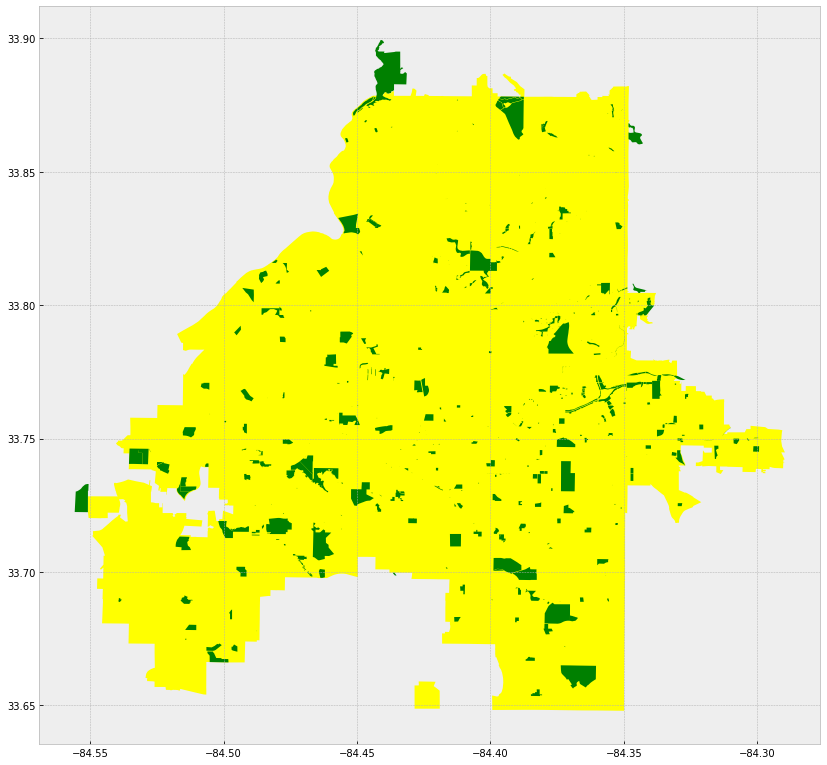

In [7]:
ax = atl_limits.plot(figsize=(14, 14), color='yellow')
atl_greenspaces.plot(ax=ax, color='green')
plt.show()